#Assignment 2 Decision Tree Classifiers

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


##Library require

In [ ]:
import os
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Connect path file in drive

In [ ]:
# params
# path_url = "/content/drive/MyDrive/Data_Mining/InClass"
# file_name = "dataset.csv"

In [ ]:
file_path = '../dataset/employee_data.csv' 
df = pd.read_csv(file_path)

#Data Exploration

In [ ]:
# shape
df.shape

(1470, 35)

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# check head
df.head(5)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,1279,...,3,80,0,2,2,1,2,2,2,2
1,No,37,Travel_Rarely,408,Research & Development,19,2,Life Sciences,1,61,...,1,80,0,8,1,3,1,0,0,0
2,No,46,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,...,3,80,0,14,4,3,9,6,0,8
3,No,35,Travel_Rarely,1229,Research & Development,8,1,Life Sciences,1,63,...,4,80,0,1,2,3,1,0,0,1
4,No,35,Travel_Rarely,1214,Research & Development,1,3,Medical,1,105,...,1,80,0,6,3,3,6,4,0,4


#Data Preprocessing

In [ ]:
# Remove variables that do not change across the observation
# all is 1
df.drop('EmployeeCount', axis=1, inplace=True)
# all is 80
df.drop('StandardHours', axis=1, inplace=True)
# all is Y (everyone age more than 18)
df.drop('Over18', axis=1, inplace=True)

In [ ]:
df.head(5)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1279,1,...,4,3,0,2,2,1,2,2,2,2
1,No,37,Travel_Rarely,408,Research & Development,19,2,Life Sciences,61,2,...,4,1,0,8,1,3,1,0,0,0
2,No,46,Travel_Frequently,1211,Sales,5,4,Marketing,62,1,...,4,3,0,14,4,3,9,6,0,8
3,No,35,Travel_Rarely,1229,Research & Development,8,1,Life Sciences,63,4,...,3,4,0,1,2,3,1,0,0,1
4,No,35,Travel_Rarely,1214,Research & Development,1,3,Medical,105,2,...,3,1,0,6,3,3,6,4,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert the category class Yes / No into 1 and 0, respectively
# Handle all seven categorical variables
# All cat are object so use LE to all object Yes, No also result in 1, 0 respectively
le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head(5)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,21,1,251,1,10,2,1,1279,1,...,4,3,0,2,2,1,2,2,2,2
1,0,37,2,408,1,19,2,1,61,2,...,4,1,0,8,1,3,1,0,0,0
2,0,46,1,1211,2,5,4,2,62,1,...,4,3,0,14,4,3,9,6,0,8
3,0,35,2,1229,1,8,1,1,63,4,...,3,4,0,1,2,3,1,0,0,1
4,0,35,2,1214,1,1,3,3,105,2,...,3,1,0,6,3,3,6,4,0,4


#Useful Function

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Make X, y from df
y = df['Attrition']
X = df.drop('Attrition', axis=1)
feature_names = X.columns

# Model assessment with 5-fold cross validation
cv_5_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# use for plot confusion heat map in three model
def plot_confusion_matrix_heatmap(cm, title):
    plt.figure(figsize=(6, 5))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Greens',  annot_kws={"size": 16})
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Negative (0)', 'Positive (1)'])
    ax.yaxis.set_ticklabels(['Negative (0)', 'Positive (1)'])
    plt.show()

#First Model (Default CART)

Model 1 Tree Depth: 19

Model 1 Confusion Matrix:
[[1049  184]
 [ 152   85]]


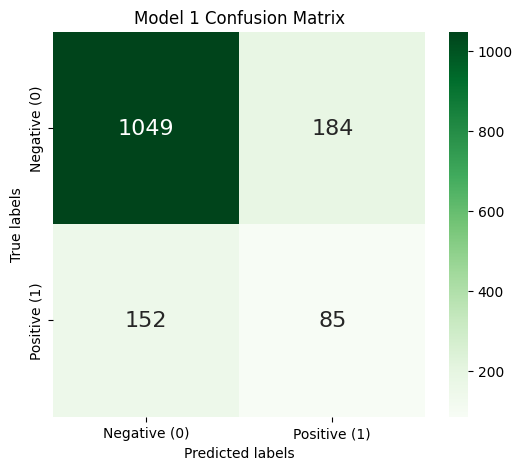

In [ ]:
# Default is gini
dt_default = DecisionTreeClassifier()

dt_default.fit(X, y)
print(f"Model 1 Tree Depth: {dt_default.get_depth()}")

y_pred_dt1 = cross_val_predict(dt_default, X, y, cv=cv_5_fold)

cm_dt1 = confusion_matrix(y, y_pred_dt1)
print("\nModel 1 Confusion Matrix:")
print(cm_dt1)

plot_confusion_matrix_heatmap(cm_dt1, 'Model 1 Confusion Matrix')

#Second Model (Tuned CART)


Model 2 Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 20}

Model 2 Confusion Matrix:
[[972 261]
 [110 127]]


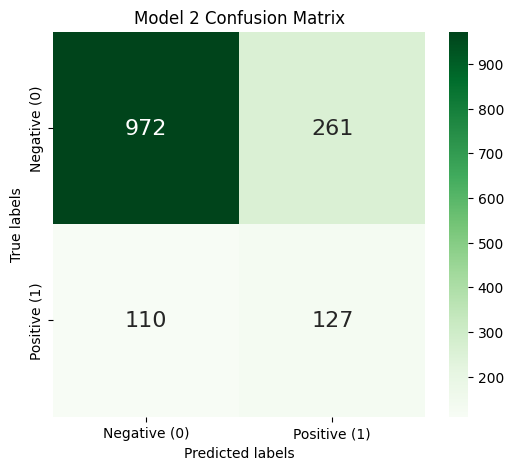

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15, None],
    'min_samples_split': [2, 5, 10, 15, 20]
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced'),
    param_grid=param_grid_dt,
    cv=cv_5_fold,
    scoring='recall',
    n_jobs=-1
)

grid_search_dt.fit(X, y)

print(f"\nModel 2 Best Hyperparameters: {grid_search_dt.best_params_}")

best_dt = grid_search_dt.best_estimator_

y_pred_dt2 = cross_val_predict(best_dt, X, y, cv=cv_5_fold)

cm_dt2 = confusion_matrix(y, y_pred_dt2)
print("\nModel 2 Confusion Matrix:")
print(cm_dt2)

plot_confusion_matrix_heatmap(cm_dt2, 'Model 2 Confusion Matrix')

#Third Model (Tuned RF)


Model 3 Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}

Model 3 Confusion Matrix:
[[1111  122]
 [ 117  120]]


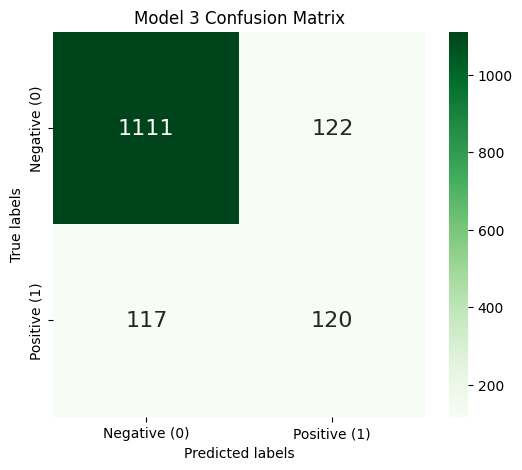

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 6, 10],
    'max_features': ['sqrt', 1.0]
}
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid_rf,
    cv=cv_5_fold,
    scoring='recall',
    n_jobs=-1
)

grid_search_rf.fit(X, y)

print(f"\nModel 3 Best Hyperparameters: {grid_search_rf.best_params_}")

best_rf = grid_search_rf.best_estimator_

y_pred_rf = cross_val_predict(best_rf, X, y, cv=cv_5_fold)
cm_rf = confusion_matrix(y, y_pred_rf)
print("\nModel 3 Confusion Matrix:")
print(cm_rf)

plot_confusion_matrix_heatmap(cm_rf, 'Model 3 Confusion Matrix')

#Feature and Importance score of Third Model

OverTime                    0.124710
MonthlyIncome               0.104264
Age                         0.065191
TotalWorkingYears           0.063529
YearsAtCompany              0.060034
StockOptionLevel            0.059032
JobLevel                    0.047376
YearsWithCurrManager        0.041055
JobRole                     0.032307
YearsInCurrentRole          0.030335
EmployeeNumber              0.030200
MaritalStatus               0.030188
DistanceFromHome            0.029230
DailyRate                   0.028019
EnvironmentSatisfaction     0.027811
MonthlyRate                 0.025200
JobSatisfaction             0.024678
JobInvolvement              0.024035
NumCompaniesWorked          0.023165
HourlyRate                  0.023141
YearsSinceLastPromotion     0.013695
PercentSalaryHike           0.013555
Department                  0.012476
WorkLifeBalance             0.011933
TrainingTimesLastYear       0.011901
EducationField              0.010819
BusinessTravel              0.010169
R

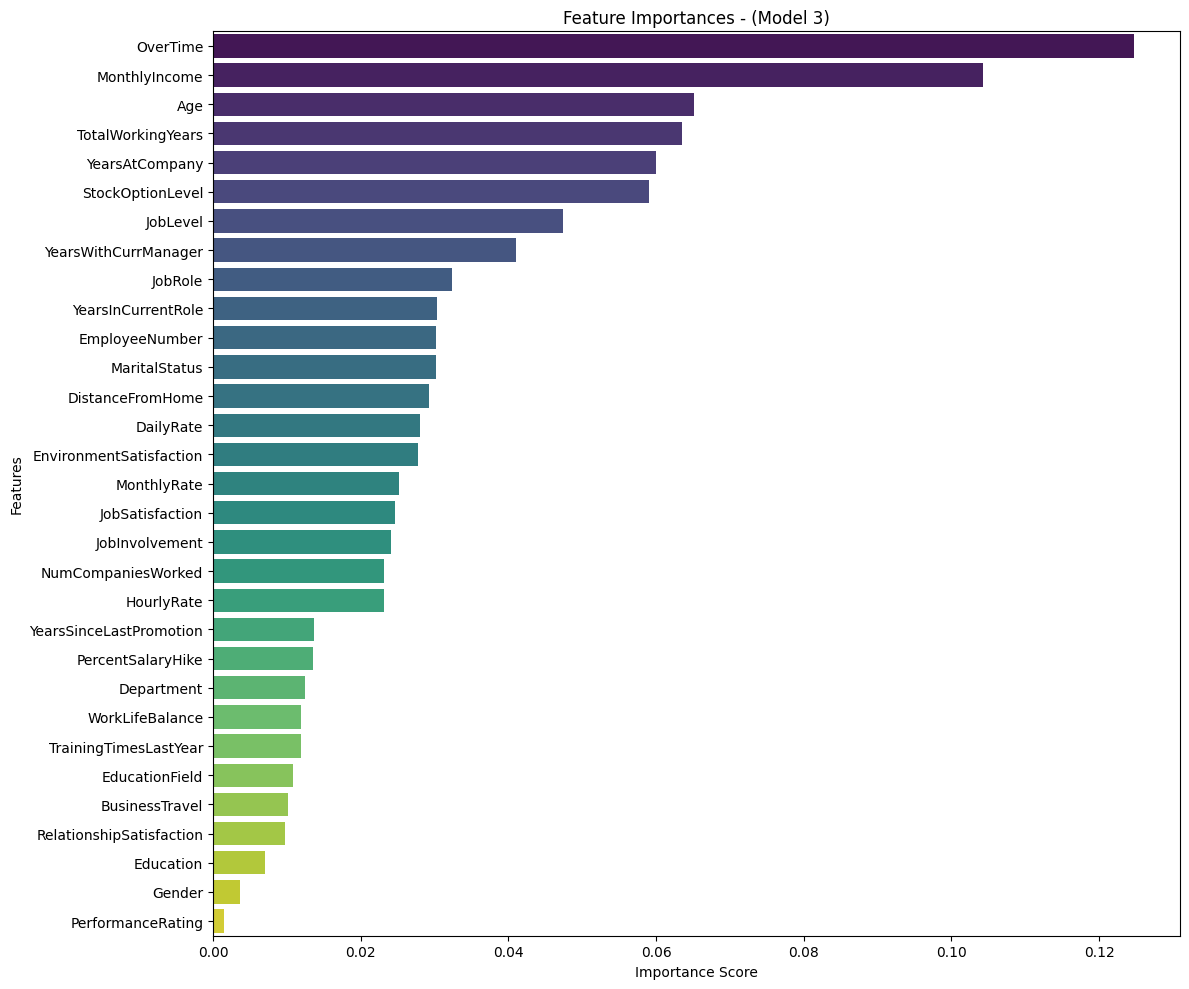

In [ ]:
best_rf.fit(X, y)
importances = best_rf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

print(forest_importances)

plt.figure(figsize=(12, 10))
sns.barplot(x=forest_importances.values, y=forest_importances.index, palette="viridis", legend=False, hue=forest_importances.index)
plt.title("Feature Importances - (Model 3)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()